In [1]:
rm(list=ls())
gc()
setwd("/hpc/group/pbenfeylab/CheWei/CW_data/genesys/")

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,624136,33.4,1358941,72.6,1358941,72.6
Vcells,1157035,8.9,8388608,64.0,1802277,13.8


In [2]:
## Need seu4
suppressMessages(library(Seurat))
suppressMessages(library(cowplot))
suppressMessages(library(scattermore))
suppressMessages(library(scater))
suppressMessages(library(cowplot))
suppressMessages(library(RColorBrewer))
suppressMessages(library(grid))
suppressMessages(library(gplots))
suppressMessages(library(circular))
suppressMessages(library(ggplot2))
suppressMessages(library(ggnewscale))
suppressMessages(library(tidyverse))
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(circlize))
suppressMessages(library(patchwork))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”


In [3]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Stream 8

Matrix products: default
BLAS/LAPACK: /hpc/group/pbenfeylab/ch416/miniconda3/envs/seu4/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=C.UTF-8           LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] patchwork_1.1.2             circlize_0.4.15            
 [3] ComplexHeatmap_2.14.0       forcats_0.5.2              
 [5] stringr_1.5.0               dplyr_1.1.1                
 [7] purrr_1.0.1                 readr_2.1.3                
 [9] tidyr_1.3.0          

## Load TF list

In [4]:
wanted_TFs <- read.csv("./Kay_TF_thalemine_annotations.csv")

In [5]:
nrow(wanted_TFs)

[1] 2484

In [6]:
## Make TF names unique
wanted_TFs$Name[wanted_TFs$GeneID=="AT2G33880"]="WOX9"
wanted_TFs$Name[wanted_TFs$GeneID=="AT2G45160"]="SCL27"
wanted_TFs$Name[wanted_TFs$GeneID=="AT5G04410"]="NAC78"
wanted_TFs$Name[wanted_TFs$GeneID=="AT3G29035"]="ORS1"
wanted_TFs$Name[wanted_TFs$GeneID=="AT2G02540"]="ZHD3"
wanted_TFs$Name[wanted_TFs$GeneID=="AT3G16500"]="IAA26"
wanted_TFs$Name[wanted_TFs$GeneID=="AT5G09740"]="HAG5"
wanted_TFs$Name[wanted_TFs$GeneID=="AT4G24660"]="ZHD2"
wanted_TFs$Name[wanted_TFs$GeneID=="AT5G46880"]="HDG5"
wanted_TFs$Name[wanted_TFs$GeneID=="AT1G28420"]="RLT1"
wanted_TFs$Name[wanted_TFs$GeneID=="AT1G14580"]="BLJ"
wanted_TFs$Name[wanted_TFs$GeneID=="AT3G45260"]="BIB"
wanted_TFs$Name[wanted_TFs$GeneID=="AT2G02070"]="RVN"
wanted_TFs$Name[wanted_TFs$GeneID=="AT2G28160"]="FIT"
wanted_TFs$Name[wanted_TFs$GeneID=="AT1G68360"]="GIS3"
wanted_TFs$Name[wanted_TFs$GeneID=="AT1G20640"]="NLP4"
wanted_TFs$Name[wanted_TFs$GeneID=="AT5G05550"]="VFP5"
wanted_TFs$Name[wanted_TFs$GeneID=="AT3G59470"]="FRF1"
wanted_TFs$Name[wanted_TFs$GeneID=="AT5G15150"]="HAT7"
wanted_TFs$Name[wanted_TFs$GeneID=="AT5G14750"]="WER"
wanted_TFs$Name[wanted_TFs$GeneID=="AT1G75710"]="BRON"
wanted_TFs$Name[wanted_TFs$GeneID=="AT1G74500"]="TMO7"
wanted_TFs$Name[wanted_TFs$GeneID=="AT2G12646"]="RITF1"
wanted_TFs$Name[wanted_TFs$GeneID=="AT3G48100"]="ARR5"
wanted_TFs$Name[wanted_TFs$GeneID=="AT4G16141"]="GATA17L"
wanted_TFs$Name[wanted_TFs$GeneID=="AT5G65640"]="NFL"
wanted_TFs$Name[wanted_TFs$GeneID=="AT1G62700"]="VND5"
wanted_TFs$Name[wanted_TFs$GeneID=="AT4G36160"]="VND2"
wanted_TFs$Name[wanted_TFs$GeneID=="AT5G66300"]="VND3"
wanted_TFs$Name[wanted_TFs$GeneID=="AT1G12260"]="VND4"
wanted_TFs$Name[wanted_TFs$GeneID=="AT5G62380"]="VND6"

In [7]:
## TTG1
wanted_TFs$Name[wanted_TFs$GeneID=="AT5G24520"]

[1] "TTG1"

In [8]:
## SCRAMBLED
wanted_TFs$Name[wanted_TFs$GeneID=="AT1G11130"]

character(0)

In [9]:
## CAPRICE
wanted_TFs$Name[wanted_TFs$GeneID=="AT2G46410"]

[1] "CPC"

### Load GRN centrality scores for each transition

In [10]:
stem2pro <- read.csv("./TF_GRN_centrality_t0-t1_zscore3.csv")
pro2trans <- read.csv("./TF_GRN_centrality_t1-t3_zscore3.csv")
trans2el <- read.csv("./TF_GRN_centrality_t3-t5_zscore3.csv")
el2el <- read.csv("./TF_GRN_centrality_t5-t7_zscore3.csv")
el2mat <- read.csv("./TF_GRN_centrality_t7-t9_zscore3.csv")

In [11]:
head(stem2pro)

,X,tf_occurance,atri_degree_centrality,atri_out_centrality,atri_in_centrality,atri_betweenness_centrality,atri_closeness_centrality,atri_eigenvector_centrality,tri_degree_centrality,tri_out_centrality,...,phl_in_centrality,phl_betweenness_centrality,phl_closeness_centrality,phl_eigenvector_centrality,col_degree_centrality,col_out_centrality,col_in_centrality,col_betweenness_centrality,col_closeness_centrality,col_eigenvector_centrality
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GAMMA-H2AX,10,0.8986486,0.3445946,0.55405405,0.824314156,0.001607054,0.11806416,0.80544747,0.12451362,...,0.1495017,0.248917916,0.0011086941,0.06175429,0.07805907,0.02742616,0.05063291,0.31334238,0.0003917786,0.03439140
2,CRF2,9,0.9729730,0.4436937,0.52927928,0.987777846,0.001552485,0.12188729,1.17898833,0.73929961,...,0.3172757,0.630057324,0.0013108166,0.07501625,0.79746835,0.33438819,0.46308017,0.93998481,0.0005974520,0.11139614
3,HMGB6,9,0.2612613,0.2049550,0.05630631,0.002308177,0.001400878,0.06217343,0.45136187,0.28015564,...,0.1029900,0.005635679,0.0009932707,0.04870514,0.03375527,0.01582278,0.01793249,0.00000000,0.0003046752,0.01628732
4,HAT1,9,0.4054054,0.2162162,0.18918919,0.002852175,0.001266005,0.07435692,0.05058366,0.04669261,...,0.4302326,0.967158833,0.0012671678,0.08334429,0.48206751,0.24156118,0.24050633,0.02677119,0.0005415002,0.09398170
5,GRP2B,9,0.2702703,0.1238739,0.14639640,0.038954304,0.001162324,0.06130034,0.00000000,0.00000000,...,0.5332226,0.966937717,0.0012946771,0.08259318,0.67299578,0.41561181,0.25738397,0.28124346,0.0005718634,0.10969489
6,HB-2,9,0.5045045,0.3243243,0.18018018,0.621901247,0.001388507,0.08859595,0.04669261,0.01167315,...,0.3039867,0.856015169,0.0013859050,0.08585141,0.54852321,0.13502110,0.41350211,0.01482474,0.0005300467,0.10354056


In [12]:
min_max_normalize <- function(data) {
  min_val <- min(data)
  max_val <- max(data)
  normalized_data <- (data - min_val) / (max_val - min_val)
  return(normalized_data)
}

In [13]:
summary(stem2pro$tri_betweenness_centrality)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.0236  0.0000  0.9904 

In [14]:
summary(min_max_normalize(stem2pro$tri_betweenness_centrality))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.02383 0.00000 1.00000 

In [15]:
ncol(stem2pro)

[1] 62

In [16]:
stem2pro <- as.data.frame(cbind(stem2pro[,1],apply(stem2pro[,3:62],2,min_max_normalize)))
pro2trans <- as.data.frame(cbind(pro2trans[,1],apply(pro2trans[,3:62],2,min_max_normalize)))
trans2el <- as.data.frame(cbind(trans2el[,1],apply(trans2el[,3:62],2,min_max_normalize)))
el2el <- as.data.frame(cbind(el2el[,1],apply(el2el[,3:62],2,min_max_normalize)))
el2mat <- as.data.frame(cbind(el2mat[,1],apply(el2mat[,3:62],2,min_max_normalize)))

In [17]:
dat <- stem2pro %>%
left_join(pro2trans, by = "V1") %>%
left_join(trans2el, by = "V1") %>%
left_join(el2el, by = "V1") %>%
left_join(el2mat, by = "V1") 

In [18]:
dat[is.na(dat)] <- 0

In [19]:
n <- c('atri_degree_centrality','atri_out_centrality','atri_in_centrality','atri_betweenness_centrality','atri_closeness_centrality','atri_eigenvector_centrality',
       'tri_degree_centrality','tri_out_centrality','tri_in_centrality','tri_betweenness_centrality','tri_closeness_centrality','tri_eigenvector_centrality',
       'lrc_degree_centrality','lrc_out_centrality','lrc_in_centrality','lrc_betweenness_centrality','lrc_closeness_centrality','lrc_eigenvector_centrality',
       'cor_degree_centrality','cor_out_centrality','cor_in_centrality','cor_betweenness_centrality','cor_closeness_centrality','cor_eigenvector_centrality',
       'end_degree_centrality','end_out_centrality','end_in_centrality','end_betweenness_centrality','end_closeness_centrality','end_eigenvector_centrality',
       'per_degree_centrality','per_out_centrality','per_in_centrality','per_betweenness_centrality','per_closeness_centrality','per_eigenvector_centrality',
       'pro_degree_centrality','pro_out_centrality','pro_in_centrality','pro_betweenness_centrality','pro_closeness_centrality','pro_eigenvector_centrality',
       'xyl_degree_centrality','xyl_out_centrality','xyl_in_centrality','xyl_betweenness_centrality','xyl_closeness_centrality','xyl_eigenvector_centrality',
       'phl_degree_centrality','phl_out_centrality','phl_in_centrality','phl_betweenness_centrality','phl_closeness_centrality','phl_eigenvector_centrality',
       'col_degree_centrality','col_out_centrality','col_in_centrality','col_betweenness_centrality','col_closeness_centrality','col_eigenvector_centrality')

In [20]:
colnames(dat) <- c("TF",gsub("$","_1",n), gsub("$","_2",n),gsub("$","_3",n),gsub("$","_4",n),gsub("$","_5",n))

In [21]:
GeneID <- wanted_TFs$GeneID[match(dat$TF, wanted_TFs$Name)]

In [22]:
dat <- cbind(GeneID, dat)

In [23]:
head(dat)

,GeneID,TF,atri_degree_centrality_1,atri_out_centrality_1,atri_in_centrality_1,atri_betweenness_centrality_1,atri_closeness_centrality_1,atri_eigenvector_centrality_1,tri_degree_centrality_1,tri_out_centrality_1,...,phl_in_centrality_5,phl_betweenness_centrality_5,phl_closeness_centrality_5,phl_eigenvector_centrality_5,col_degree_centrality_5,col_out_centrality_5,col_in_centrality_5,col_betweenness_centrality_5,col_closeness_centrality_5,col_eigenvector_centrality_5
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AT1G54690,GAMMA-H2AX,0.776264591439689,0.495145631067961,0.763975155279503,0.834513711603393,0.940151233514354,0.954898795508496,0.63302752293578,0.135593220338983,...,0.00353356890459364,0,0.433778629760381,0.0384080822193205,0,0,0,0,0,0
2,AT4G23750,CRF2,0.840466926070039,0.637540453074434,0.729813664596273,1,0.90822754077444,0.985820114506607,0.926605504587156,0.805084745762712,...,0.0117785630153121,0.0001122768497611,0.579606861231972,0.117223661689331,0,0,0,0,0,0
3,AT5G23420,HMGB6,0.22568093385214,0.294498381877023,0.077639751552795,0.0023367372148563,0.819534761406972,0.502856548739284,0.35474006116208,0.305084745762712,...,0,0,0,0,0,0,0,0,0,0
4,AT4G17460,HAT1,0.350194552529183,0.310679611650485,0.260869565217391,0.00288746602981141,0.740632037115667,0.601396170660393,0.0397553516819572,0.0508474576271186,...,0.00235571260306243,0,0.462623504191286,0.0384080822193205,0.00424088210347752,0.00672268907563025,0.00171232876712329,0,0.534086128307187,0.0342094681539202
5,AT2G21060,GRP2B,0.233463035019455,0.177993527508091,0.201863354037267,0.0394363007494029,0.67997746133997,0.495794974854396,0,0,...,0.156654888103651,0.00484869654894231,0.874134371864073,0.556195610463054,0.00508905852417303,0.00672268907563025,0.00342465753424658,0,0.474466815605091,0.0339845056831895
6,AT4G16780,HB-2,0.43579766536965,0.466019417475728,0.248447204968944,0.629596269455653,0.81229784641811,0.716560956988195,0.036697247706422,0.0127118644067797,...,0.00117785630153121,0,0.398777242871396,0.0289197059513674,0,0,0,0,0,0


In [24]:
numz <- function(x){
    sum(x==0)/length(x)
}

In [25]:
dat$combined_score <- min_max_normalize(rowSums(apply(dat[,grep("centrality",colnames(dat))],2,as.numeric)))
dat$celltype_specificity <- min_max_normalize(apply(apply(dat[,grep("centrality",colnames(dat))],2,as.numeric),1,numz))
dat$weighted_score <- dat$combined_score + dat$celltype_specificity
dat <- dat %>% arrange(desc(weighted_score))

In [26]:
head(dat)

,GeneID,TF,atri_degree_centrality_1,atri_out_centrality_1,atri_in_centrality_1,atri_betweenness_centrality_1,atri_closeness_centrality_1,atri_eigenvector_centrality_1,tri_degree_centrality_1,tri_out_centrality_1,...,phl_eigenvector_centrality_5,col_degree_centrality_5,col_out_centrality_5,col_in_centrality_5,col_betweenness_centrality_5,col_closeness_centrality_5,col_eigenvector_centrality_5,combined_score,celltype_specificity,weighted_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,AT5G24800,BZIP9,0,0,0,0,0,0,0,0,...,0.991229312680569,0,0,0,0,0,0,0.7370916,0.6000000,1.337092
2,AT3G43430,AT3G43430,0,0,0,0,0,0,0,0,...,0.481531356662094,0,0,0,0,0,0,0.7528181,0.4978723,1.250690
3,AT5G15150,HAT7,0,0,0,0,0,0,0.253822629969419,0.038135593220339,...,0,0,0,0,0,0,0,0.7999175,0.4425532,1.242471
4,AT3G20840,PLT1,0.961089494163424,0.970873786407767,0.602484472049689,0.976313513958659,0.914746192175766,0.986144172298438,0,0,...,0,0.0398642917726887,0.0756302521008403,0.00342465753424658,0,0.745449540294179,0.250685880776617,0.5516755,0.6680851,1.219761
5,AT5G57620,MYB36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.4791306,0.7148936,1.194024
6,AT2G45050,GATA2,1,0.828478964401295,0.801242236024845,0.998594869472124,0.965657213462023,1,0.981651376146789,0.936440677966102,...,0,0,0,0,0,0,0,0.7860795,0.4042553,1.190335


In [784]:
write.csv(dat,"TF_GRN_centrality_all_transition_zscore3.csv", quote=FALSE, row.names=FALSE)

## GO terms (Prepare MINI-EX GS)

In [27]:
gene_list <- read.table('./gene_list_1108.csv', sep=",", header = TRUE)

In [28]:
exptf <- intersect(gene_list$features, wanted_TFs$GeneID)
length(exptf)

[1] 1495

In [29]:
sfun <- read.csv('./functional_GS_root_unique.csv', sep=",", header=TRUE)

In [30]:
gsgo <- intersect(exptf, sfun$GeneID)
length(gsgo)

[1] 143

In [35]:
write.csv(data.frame(GeneID=gsgo),"./Gold_Standard_Root_TF_MINI_EX.csv", quote=FALSE, row.names=FALSE)

## R50

In [31]:
r50 <- 72
numz <- function(x){
    sum(x==0)/length(x)
}

#### GeneSys

In [32]:
genesys <- dat

In [33]:
run_r50_genesys <- function(x){
    genesys$combined_score <- min_max_normalize(rowSums(apply(genesys[,grep(x,colnames(genesys))],2,as.numeric)))
    genesys <- genesys %>% arrange(desc(combined_score))
    count <- 0
    for (i in seq(nrow(genesys))){
        if (genesys$GeneID[i] %in% gsgo){
            count <- count +1
            if (count == r50){
                return(i)
                break
            }
        }
    }
} 

#### CellOracle

In [34]:
prepros <- function(x){
    dat <- read.csv(x)
    #dat <- dat %>% filter(role=="Connector Hub") 
    dat <- dat[,c(1, grep("centrality",colnames(dat)), 22)]
    return(dat)
}

In [35]:
atri <- prepros("../celloracle/atrichoblast_Root_Atlas_SCT_celloracle_gene_score_iGRN.csv")
tri <- prepros("../celloracle/trichoblast_Root_Atlas_SCT_celloracle_gene_score_iGRN.csv")
lrc <- prepros("../celloracle/lrc_Root_Atlas_SCT_celloracle_gene_score_iGRN.csv")
cor <- prepros("../celloracle/cortex_Root_Atlas_SCT_celloracle_gene_score_iGRN.csv")
end <- prepros("../celloracle/endodermis_Root_Atlas_SCT_celloracle_gene_score_iGRN.csv")
per <- prepros("../celloracle/pericycle_Root_Atlas_SCT_celloracle_gene_score_iGRN.csv")
pro <- prepros("../celloracle/procambium_Root_Atlas_SCT_celloracle_gene_score_iGRN.csv")
xyl <- prepros("../celloracle/xylem_Root_Atlas_SCT_celloracle_gene_score_iGRN.csv")
phl <- prepros("../celloracle/phloem_Root_Atlas_SCT_celloracle_gene_score_iGRN.csv")
col <- prepros("../celloracle/columella_Root_Atlas_SCT_celloracle_gene_score_iGRN.csv")

In [36]:
dat <- rbind(atri, tri, lrc, cor, end, per, pro, xyl, phl, col)
## Remove those not present in the dataset
dat <- dat[!is.na(match(dat$X,exptf)),]
dat <- dat %>% group_by(cluster) %>% reframe(GeneID=X,degree_centrality = min_max_normalize(degree_centrality_all), 
                                  in_centrality = min_max_normalize(degree_centrality_in), 
                                  out_centrality = min_max_normalize(degree_centrality_out),
                                 betweenness_centrality = min_max_normalize(betweenness_centrality),
                                 closeness_centrality = min_max_normalize(closeness_centrality),
                                 eigenvector_centrality = min_max_normalize(eigenvector_centrality))
dat <- dat %>% group_by(GeneID) %>% reframe(degree_centrality = sum(degree_centrality), 
                                  in_centrality = sum(in_centrality), 
                                  out_centrality = sum(out_centrality),
                                 betweenness_centrality = sum(betweenness_centrality),
                                 closeness_centrality = sum(closeness_centrality),
                                 eigenvector_centrality = sum(eigenvector_centrality))
dat <- cbind(dat[,1],apply(dat[,2:7],2,min_max_normalize))

In [37]:
head(dat)

,GeneID,degree_centrality,in_centrality,out_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AT1G01010,0.0849393998,0.065317964,0.081735954,2.592974e-02,0.3643692412,0.068339145
2,AT1G01030,0.0009542021,0.000000000,0.004447568,0.000000e+00,0.0003449773,0.003632920
3,AT1G01260,0.0233438132,0.000000000,0.033565069,0.000000e+00,0.0872081085,0.016136854
4,AT1G01350,0.0293468347,0.134378356,0.000000000,0.000000e+00,0.0000000000,0.017764785
5,AT1G01380,0.0035614661,0.005492245,0.004573149,7.240465e-05,0.0852853904,0.003752290
6,AT1G01640,0.0060441842,0.023215800,0.000000000,0.000000e+00,0.0000000000,0.006672674


In [38]:
celloracle <- dat

In [39]:
run_r50_celloracle <- function(x){
    celloracle$combined_score <- celloracle[,grep(x,colnames(celloracle))]
    celloracle <- celloracle %>% arrange(desc(combined_score))
    count <- 0
    for (i in seq(nrow(celloracle))){
        if (celloracle$GeneID[i] %in% gsgo){
            count <- count +1
            if (count == r50){
                return(i)
                break
            }
        }
    }
} 

#### DE (Root_Atlas)

In [40]:
de <- read.csv("Root_Atlas_DE_Gene_List.csv")

In [41]:
de <- de %>% arrange(pct.diff_rank) %>% arrange(avg_diff_rank)%>% arrange(myAUC_rank)%>% arrange(combined_rank) 

In [42]:
## Remove those not present in the dataset
de <- de[!is.na(match(de$gene.ID,exptf)),]

In [43]:
head(de)

,myAUC,avg_diff,power,pct.1,pct.2,celltype,pseudotime.bin,gene.ID,gene.name,pct.diff,pct.diff_rank,avg_diff_rank,myAUC_rank,combined_rank
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>
13,0.901,1.985825,0.802,0.959,0.287,Endodermis,T4,AT5G13910,LEP,0.672,2,4,1,1
40,0.934,2.820810,0.868,0.900,0.155,Procambium,T0,AT1G54690,HTA3,0.745,2,35,2,1
51,0.841,2.351595,0.682,0.881,0.297,Procambium,T1,AT1G25560,TEM1,0.584,1,11,3,1
58,0.979,3.799126,0.958,1.000,0.046,Xylem,T1,AT4G22680,MYB85,0.954,1,7,4,1
63,0.945,4.666402,0.890,0.765,0.054,Phloem,T2,AT3G60530,GATA4,0.711,35,1,5,1
66,0.871,2.623028,0.742,0.877,0.242,Procambium,T2,AT1G66600,WRKY63,0.635,1,5,5,1


In [44]:
dat <- de %>% group_by(gene.ID) %>% reframe(combined_rank = mean(combined_rank),myAUC_rank = mean(myAUC_rank),pct.diff_rank = mean(pct.diff_rank),avg_diff_rank = mean(avg_diff_rank))
dat <- dat %>% arrange(combined_rank)
colnames(dat) <- c("GeneID","combined_rank","myAUC_rank","pct.diff_rank","avg_diff_rank")

In [45]:
head(dat)

GeneID,combined_rank,myAUC_rank,pct.diff_rank,avg_diff_rank
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AT1G66600,6.500000,19.50000,23.00000,11.50000
AT5G58010,8.333333,9.00000,7.00000,16.00000
AT1G13600,9.500000,42.00000,34.50000,19.50000
AT4G37260,12.333333,10.33333,20.33333,41.66667
AT1G26680,13.000000,73.00000,37.00000,78.00000
AT1G61660,13.000000,19.66667,17.33333,38.33333


In [46]:
de <- dat

In [47]:
run_r50_de <- function(x){
    de$combined_score <- de[,grep(x,colnames(de))]
    de <- de %>% arrange(desc(combined_score))
    count <- 0
    for (i in seq(nrow(de))){
        if (de$GeneID[i] %in% gsgo){
            count <- count +1
            if (count == r50){
                return(i)
                break
            }
        }
    }
} 

#### Plot r50 with ranked by different centrality

In [48]:
## Expressed TFs permutation
R50_permutation <- c()
for (j in 1:1000){
ran <- sample(exptf, length(exptf), replace=FALSE)
count <- 0
for (i in seq(length(ran))){
    if (ran[i] %in% gsgo){
        count <- count +1
        if (count == r50){
            R50_permutation <- c(R50_permutation,i)
            break
        }
    }
}
} 

In [49]:
toplt <- data.frame(Methods=c("GeneSys degree centrality", "GeneSys out centrality", "GeneSys in centrality", "GeneSys betweenness centrality", 
                 "GeneSys closeness centrality", "GeneSys eigenvector centrality","CellOracle degree centrality", "CellOracle out centrality", 
                 "CellOracle in centrality", "CellOracle betweenness centrality", "CellOracle closeness centrality", "CellOracle eigenvector centrality",
                 "DE myAUC rank", "DE pct diff rank", "DE avg diff rank", "Expressed TFs permutation"),
           R50=c(run_r50_genesys('degree_centrality'),run_r50_genesys('out_centrality'),run_r50_genesys('in_centrality'),
                 run_r50_genesys('betweenness_centrality'),run_r50_genesys('closeness_centrality'),run_r50_genesys('eigenvector_centrality'),
                 run_r50_celloracle('degree_centrality'),run_r50_celloracle('out_centrality'),run_r50_celloracle('in_centrality'),
                 run_r50_celloracle('betweenness_centrality'),run_r50_celloracle('closeness_centrality'),run_r50_celloracle('eigenvector_centrality'),
                 run_r50_de('myAUC_rank'),run_r50_de('pct.diff_rank'),run_r50_de('avg_diff_rank'), mean(R50_permutation)))

In [50]:
toplt

Methods,R50
<chr>,<dbl>
GeneSys degree centrality,335.000
GeneSys out centrality,373.000
GeneSys in centrality,340.000
GeneSys betweenness centrality,311.000
GeneSys closeness centrality,722.000
GeneSys eigenvector centrality,411.000
CellOracle degree centrality,512.000
CellOracle out centrality,506.000
CellOracle in centrality,441.000


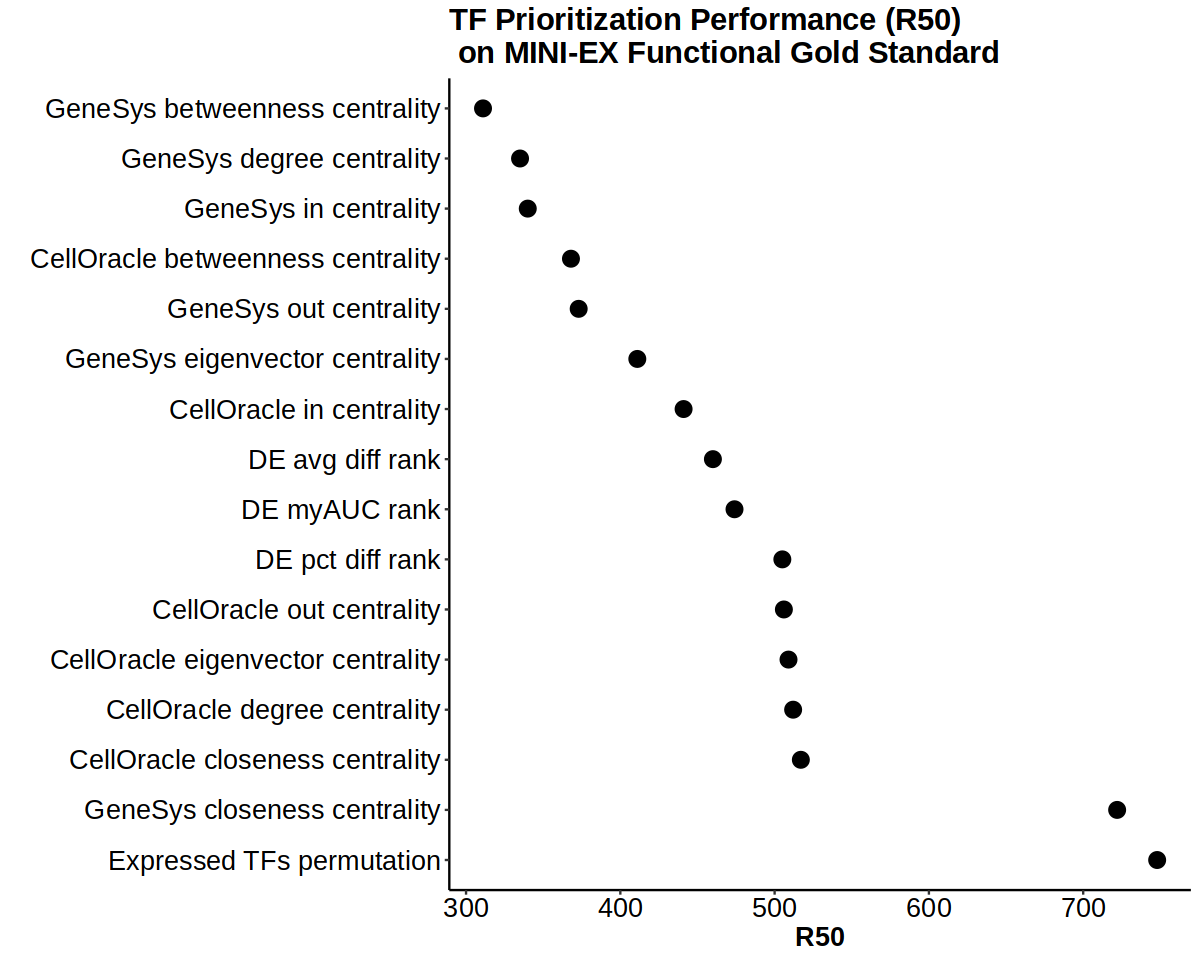

In [51]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(toplt, aes(x=reorder(Methods, R50, decreasing = TRUE),  y=R50)) + geom_point(size=4)+ 
  labs(title="TF Prioritization Performance (R50) \n on MINI-EX Functional Gold Standard",x="", y = "R50")+
  theme_classic()+
  theme(axis.text.x = element_text(color = "black", 
                           size = 16, angle = 0),
          axis.text.y = element_text( color = "black", 
                           size = 16, angle = 0),
        plot.title = element_text(color="black", size=18, face="bold"),
        axis.title.x = element_text(color="black", size=16, face="bold"))+ coord_flip()

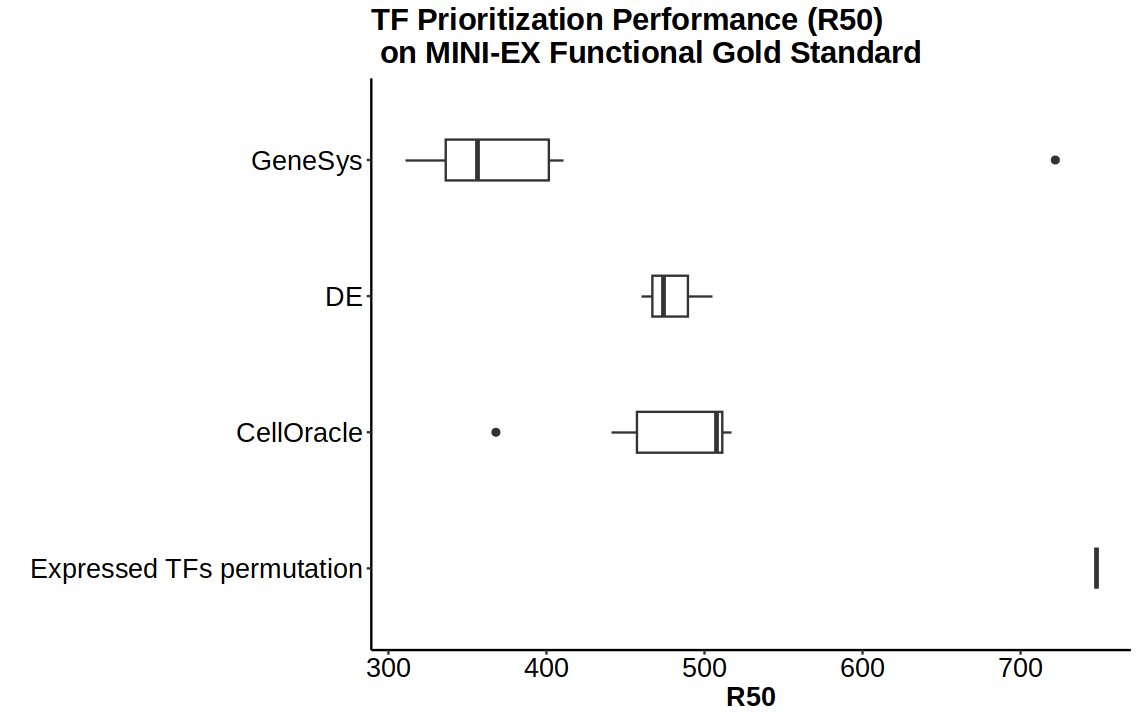

In [56]:
toplt <- data.frame(Methods=factor(c(rep("GeneSys",6), rep("CellOracle",6), rep("DE",3), "Expressed TFs permutation"), 
                                   levels=c("Expressed TFs permutation","CellOracle",  "DE", "GeneSys")), R50=toplt$R50)

options(repr.plot.width=9.5, repr.plot.height=6)
ggplot(toplt, aes(x=Methods, y=R50))+
  geom_boxplot(width=0.3)+ 
  labs(title="TF Prioritization Performance (R50) \n on MINI-EX Functional Gold Standard",x="", y = "R50")+
  theme_classic()+
  theme(axis.text.x = element_text(color = "black", 
                           size = 16, angle = 0),
          axis.text.y = element_text( color = "black", 
                           size = 16, angle = 0),
        plot.title = element_text(color="black", size=18, face="bold"),
        axis.title.x = element_text(color="black", size=16, face="bold"))+ coord_flip()